/tmp/ipykernel_65871/433010567.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


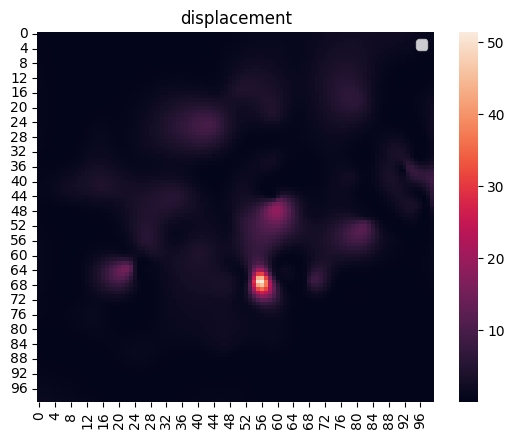

In [2]:
from cellmech.fttc import *
from cellmech.bead_detection import bead_image_correlation
import numpy as np
from PIL import Image
import seaborn as sns


# define all the parameters that are required to calculata traction forces
cellmechparams = CellMechParameters({
    "p" : 0.5,
    "E" : 10e3,
    "pi" : np.pi,
    "N" : 100,
    "width" :2 
})


# calculation of force field using gaussian
image1 = np.array(Image.open('images/img6/bead_image_before.png').convert('L'))
image2 = np.array(Image.open('images/img6/bead_image_after.png').convert('L'))
dUx, dUy = bead_image_correlation(image1, image2, 100)

sns.heatmap(dUx**2 + dUy**2)
plt.title("displacement")
plt.legend()


/tmp/ipykernel_65871/3176575150.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


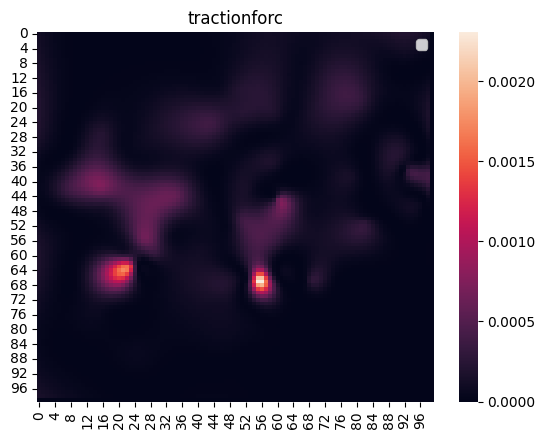

In [3]:
displacement = 1e-6*np.stack((dUx, dUy), axis=2)
force_field  = calculate_traction_force(displacement, cellmechparams)

Fx, Fy = force_field[:, :, 0], force_field[:, :, 1]
sns.heatmap(Fx**2 + Fy**2)
plt.title("tractionforc")
plt.legend()